In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_fb= pd.read_csv('/content/Copy of Facebook_Analytics - DO NOT DELETE (for interview purposes) - Facebook Profile Overview.csv')
df_fb.info(),df_fb.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     701 non-null    object 
 1   Page followers           701 non-null    int64  
 2   Total impressions        701 non-null    int64  
 3   Organic impressions      701 non-null    int64  
 4   Total page reactions     701 non-null    int64  
 5   Total reach              701 non-null    int64  
 6   % of reach from organic  0 non-null      float64
 7   % of reach from paid     701 non-null    float64
 8   Page post engagements    701 non-null    int64  
 9   Total likes              701 non-null    int64  
 10  New likes                701 non-null    int64  
 11  Unlikes                  701 non-null    int64  
 12  Net likes                701 non-null    int64  
 13  RowHash                  700 non-null    object 
dtypes: float64(2), int64(10), 

(None,
          Date  Page followers  Total impressions  Organic impressions  \
 0  02/03/2025            2146                 16                    0   
 1  01/03/2025            2146                108                    0   
 2  28/02/2025            2145                  1                    0   
 3  27/02/2025            2145                  9                    0   
 4  26/02/2025            2144                  5                    0   
 5  25/02/2025            2145                  0                    0   
 6  24/02/2025            2147                  1                    0   
 7  23/02/2025            2147                  1                    0   
 8  22/02/2025            2147                  0                    0   
 9  21/02/2025            2148                  3                    0   
 
    Total page reactions  Total reach  % of reach from organic  \
 0                     0           16                      NaN   
 1                     5          101        

Clean Dataset

In [6]:
# Drop the "% of reach from organic" column (since it's completely empty)
df_fb.drop(columns=["% of reach from organic"], inplace=True)

# Fill missing "RowHash" values with "MISSING"
df_fb["RowHash"].fillna("MISSING", inplace=True)


df_fb.info(), df_fb.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   701 non-null    object 
 1   Page followers         701 non-null    int64  
 2   Total impressions      701 non-null    int64  
 3   Organic impressions    701 non-null    int64  
 4   Total page reactions   701 non-null    int64  
 5   Total reach            701 non-null    int64  
 6   % of reach from paid   701 non-null    float64
 7   Page post engagements  701 non-null    int64  
 8   Total likes            701 non-null    int64  
 9   New likes              701 non-null    int64  
 10  Unlikes                701 non-null    int64  
 11  Net likes              701 non-null    int64  
 12  RowHash                701 non-null    object 
dtypes: float64(1), int64(10), object(2)
memory usage: 71.3+ KB


(None,
          Date  Page followers  Total impressions  Organic impressions  \
 0  02/03/2025            2146                 16                    0   
 1  01/03/2025            2146                108                    0   
 2  28/02/2025            2145                  1                    0   
 3  27/02/2025            2145                  9                    0   
 4  26/02/2025            2144                  5                    0   
 
    Total page reactions  Total reach  % of reach from paid  \
 0                     0           16                   0.0   
 1                     5          101                   0.0   
 2                     0            1                   0.0   
 3                     0            3                   0.0   
 4                     0            3                   0.0   
 
    Page post engagements  Total likes  New likes  Unlikes  Net likes  \
 0                      0         2109          0        0          0   
 1                   

In [9]:

df_fb["Date"] = pd.to_datetime(df_fb["Date"], format="%d/%m/%Y")
df_fb.sort_values("Date", inplace=True)

df_fb["Engagement Rate (%)"] = (df_fb["Page post engagements"] / df_fb["Total impressions"]) * 100

# Compute the average engagement rate
average_engagement_rate_fb = df_fb["Engagement Rate (%)"].mean()

# Identify top-performing post (highest engagement)
top_post_fb = df_fb.loc[df_fb["Page post engagements"].idxmax()]

print("Average Engagement: \n",average_engagement_rate_fb)
print("\n Top post by Engagement: ",top_post_fb)


Average Engagement: 
 3.7729393461185845

 Top post by Engagement:  Date                                                   2024-09-23 00:00:00
Page followers                                                        1051
Total impressions                                                    35812
Organic impressions                                                      0
Total page reactions                                                   105
Total reach                                                          27251
% of reach from paid                                                 100.0
Page post engagements                                                 4757
Total likes                                                           1003
New likes                                                                1
Unlikes                                                                  1
Net likes                                                                0
RowHash                  89eff70

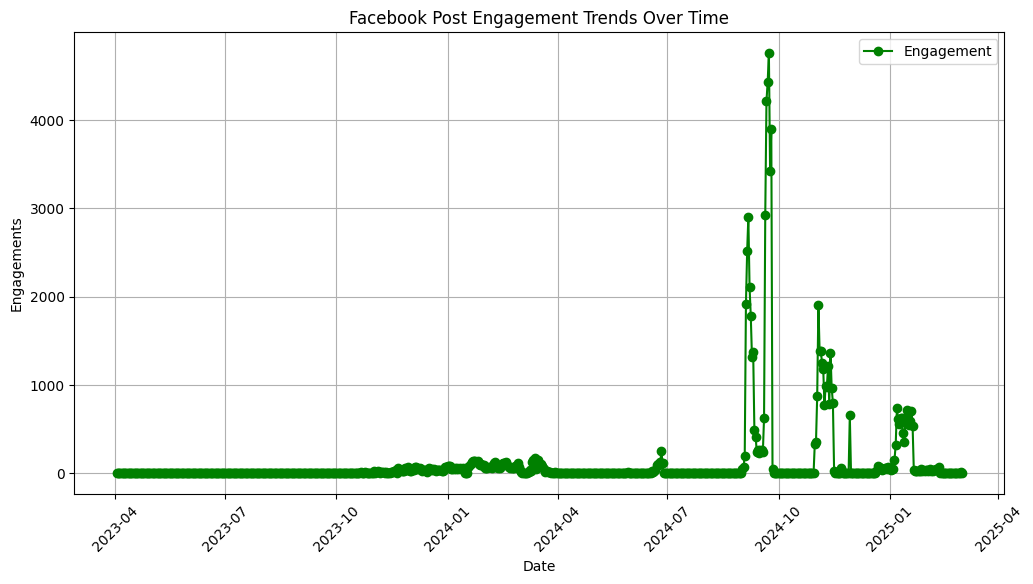

In [10]:
# Plot engagement over time
plt.figure(figsize=(12, 6))
plt.plot(df_fb["Date"], df_fb["Page post engagements"], marker="o", linestyle="-", color="g", label="Engagement")
plt.xlabel("Date")
plt.ylabel("Engagements")
plt.title("Facebook Post Engagement Trends Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [25]:
def predict_fb_post_performance(engagement, threshold=20000):
    if threshold is None:
        threshold = df_fb["Page post engagements"].mean()
    # Predict performance
    return "High-performing" if engagement >= threshold else "Low-performing"

sample_engagement_fb = 2000
prediction_fb = predict_fb_post_performance(sample_engagement_fb)
print("Prediction is: ",prediction_fb)


Prediction is:  Low-performing
